In [2]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Importing ALl necessary Libraries

In [3]:
df_ab=pd.read_csv("Abalone.csv")

Loading the Abalone Dataset for modeling

In [4]:
df_ab

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## EDA

In [5]:
df_ab.shape

(4177, 9)

Total number of rows present is 4177 and columns are 9 including the target label

In [6]:
df_ab.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

This clearly shows that the dataset has no null values present in it.


In [7]:
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


This shows only one column 'Sex' is catogorical column and rest of the columns are numerical.

In [8]:
df_ab.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df_ab.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

For skewness the acceptable range is of +/-0.5. And we see that none of the columns fall under that range indicating the presence of outliers. So we will treat the problems and clean the dataset before building our machine learning models.

### Visualization:

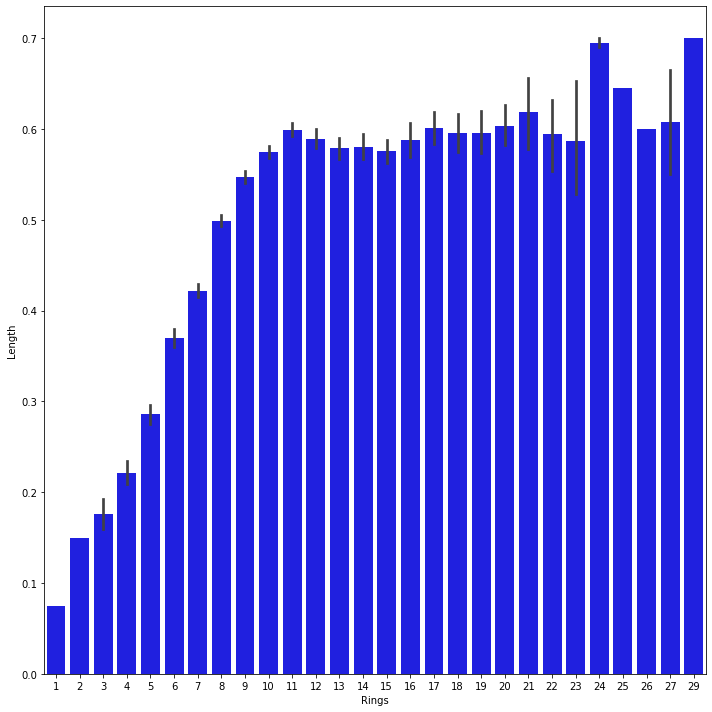

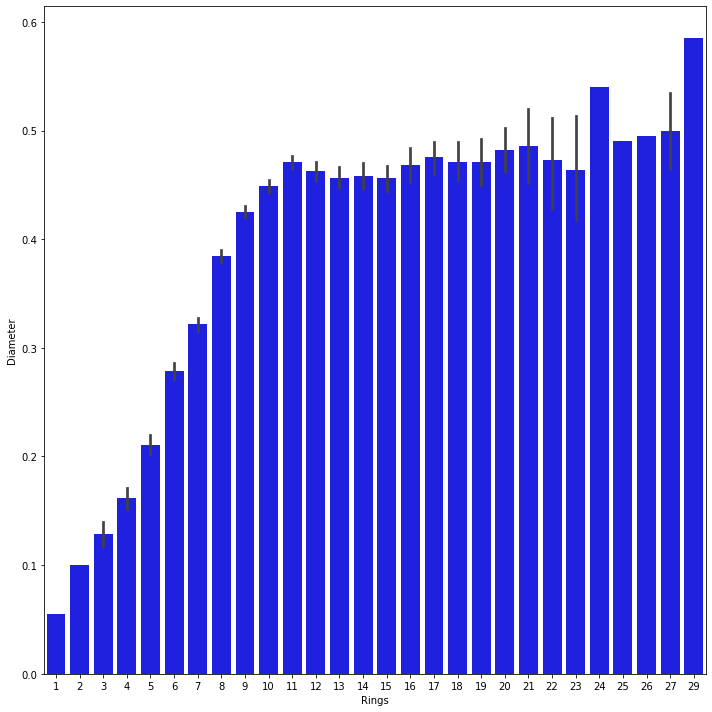

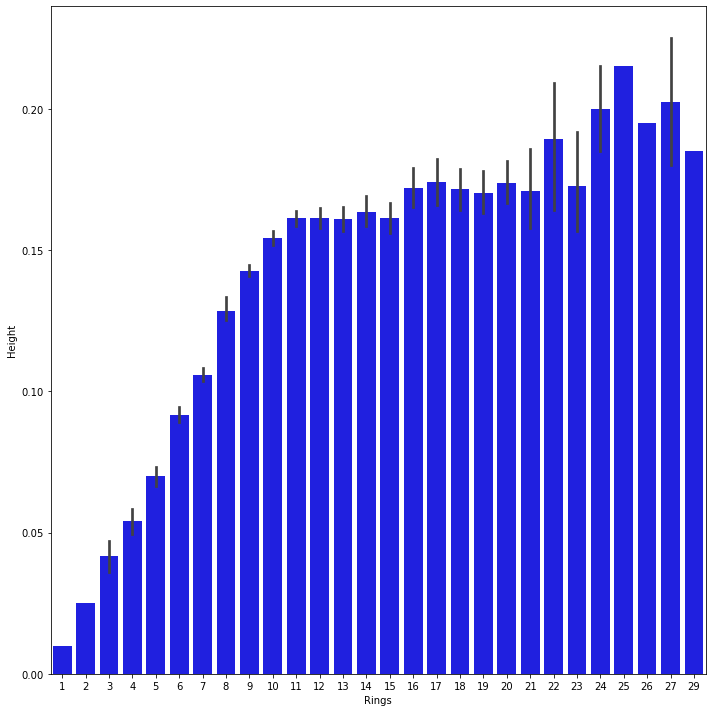

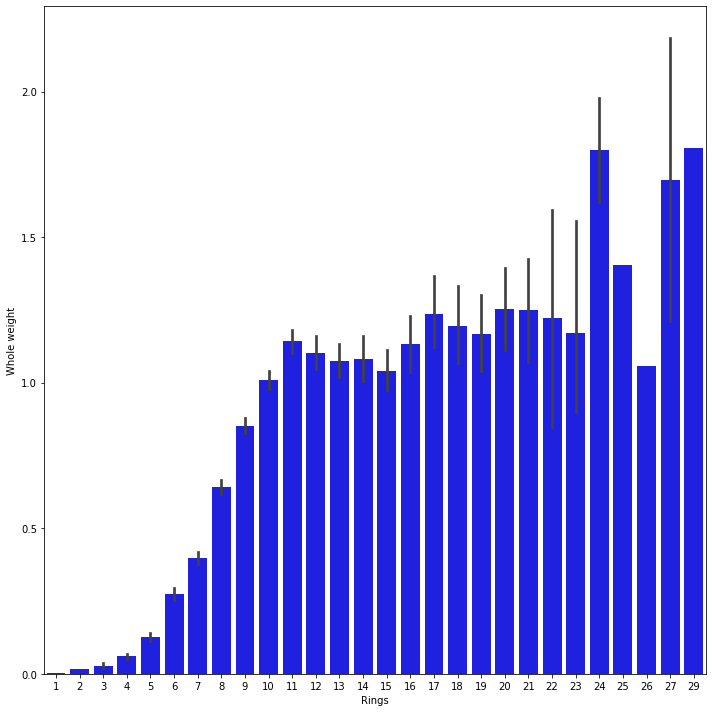

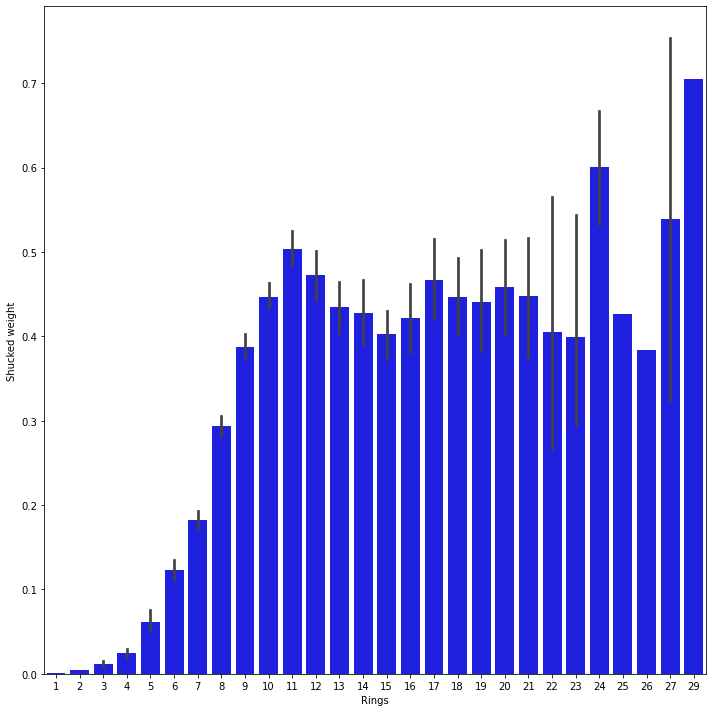

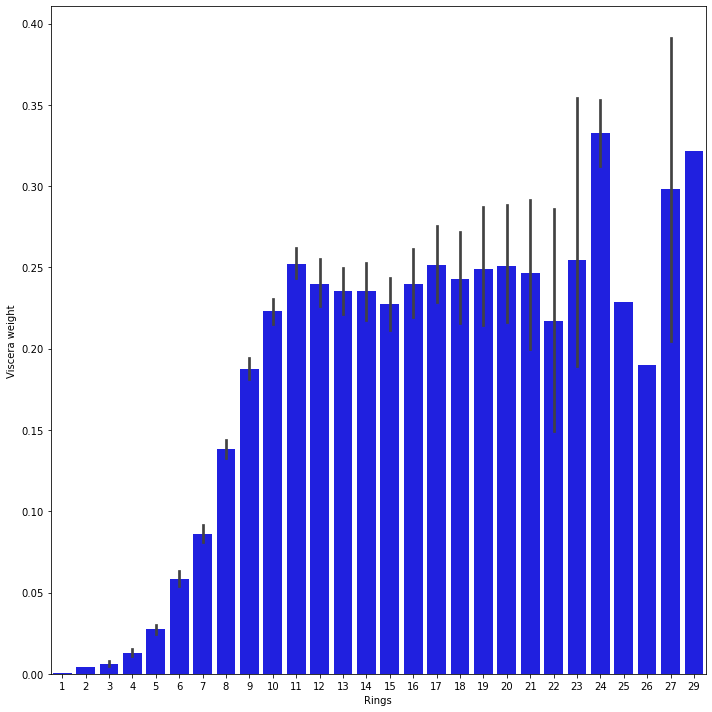

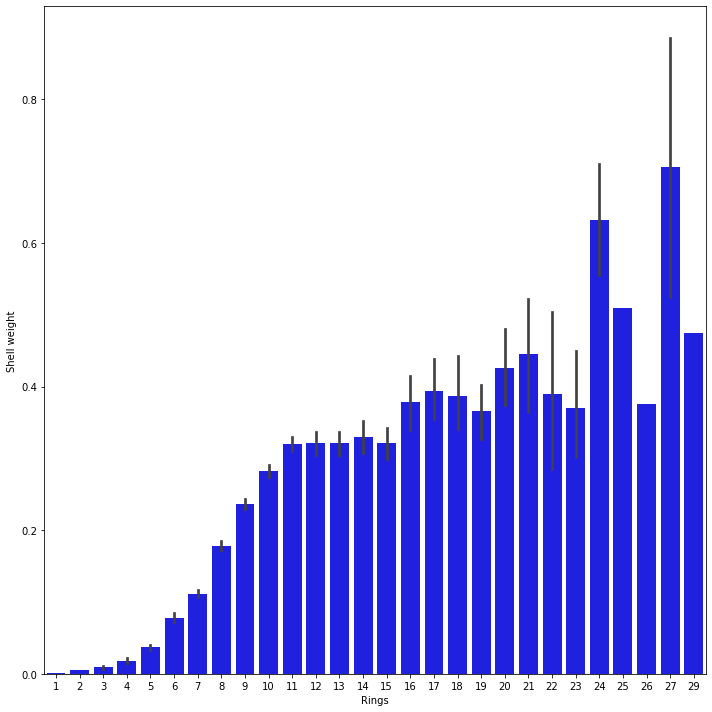

In [10]:
index=0
label=df_ab['Rings']
features=df_ab.drop(['Rings','Sex'],axis=1)

for col in features.items():
    plt.figure(figsize=(10,10))
    sns.barplot(x=label,y=col[index],data=df_ab,color="blue")
    plt.tight_layout()
    plt.show()

From the Bar Plot we can figure it out that each features are in relationship with the label. The strength may however get varied from each features.

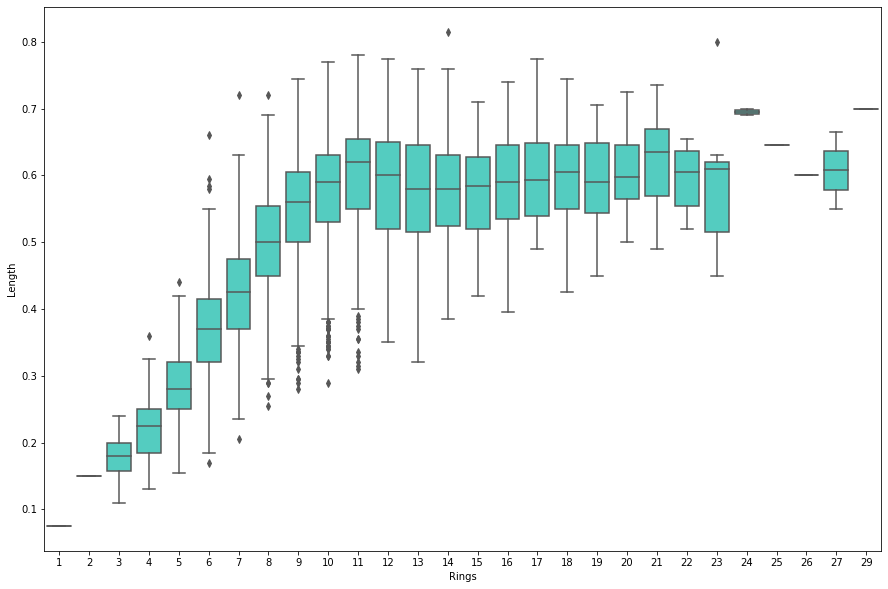

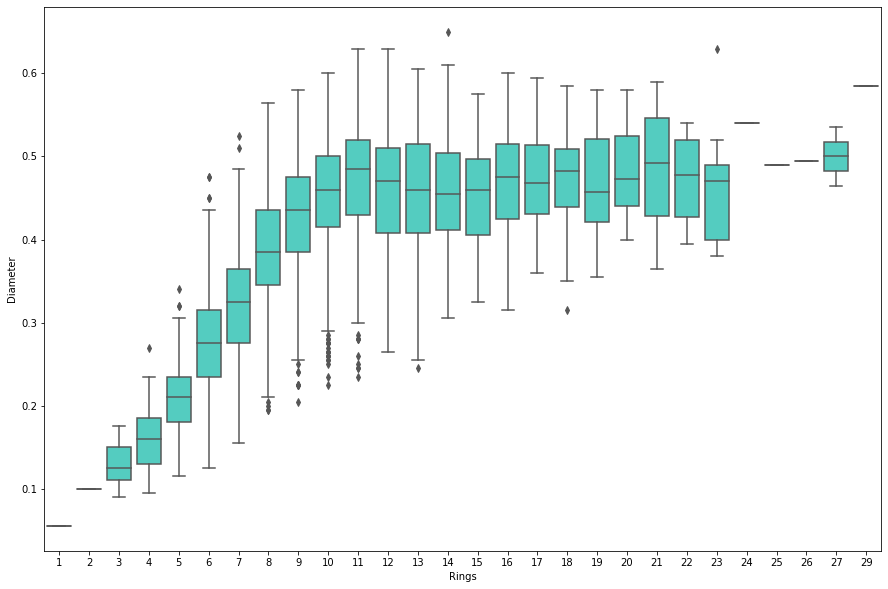

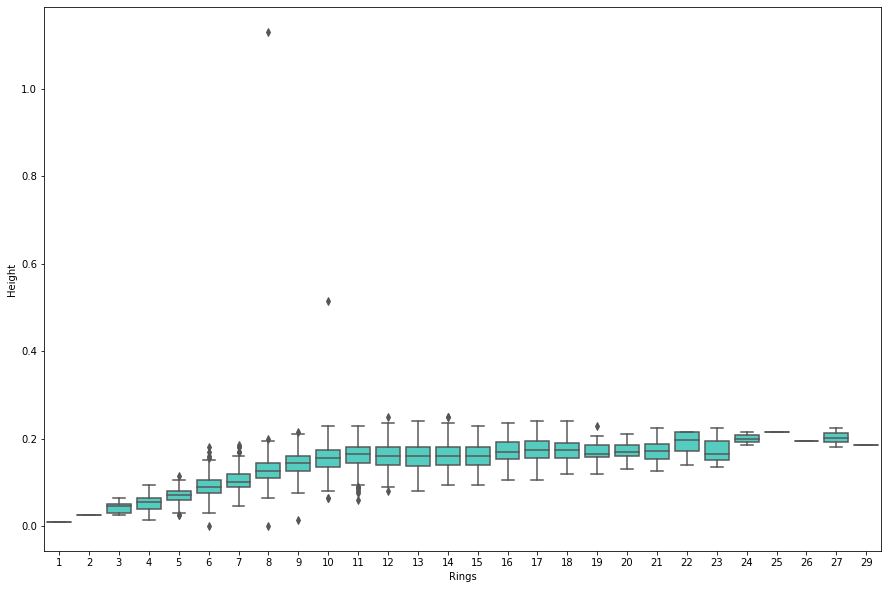

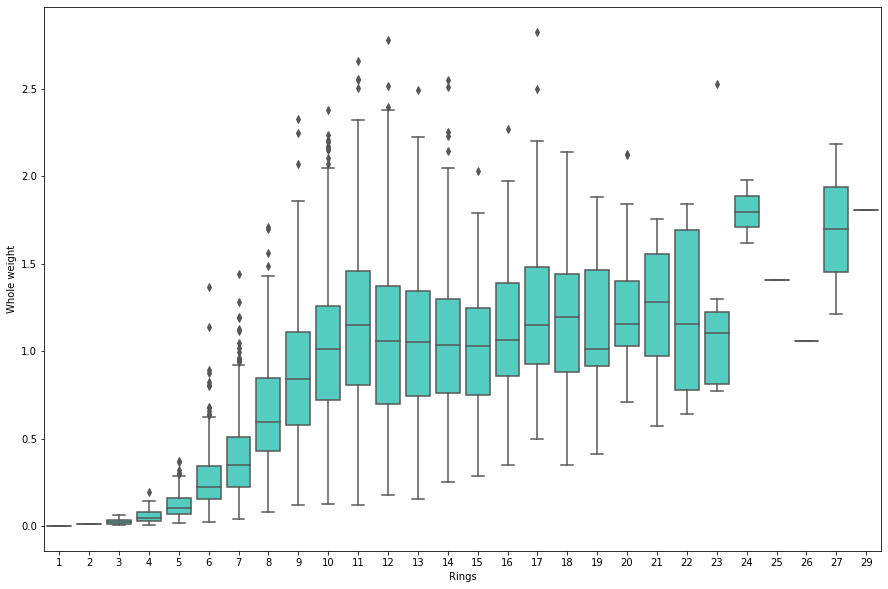

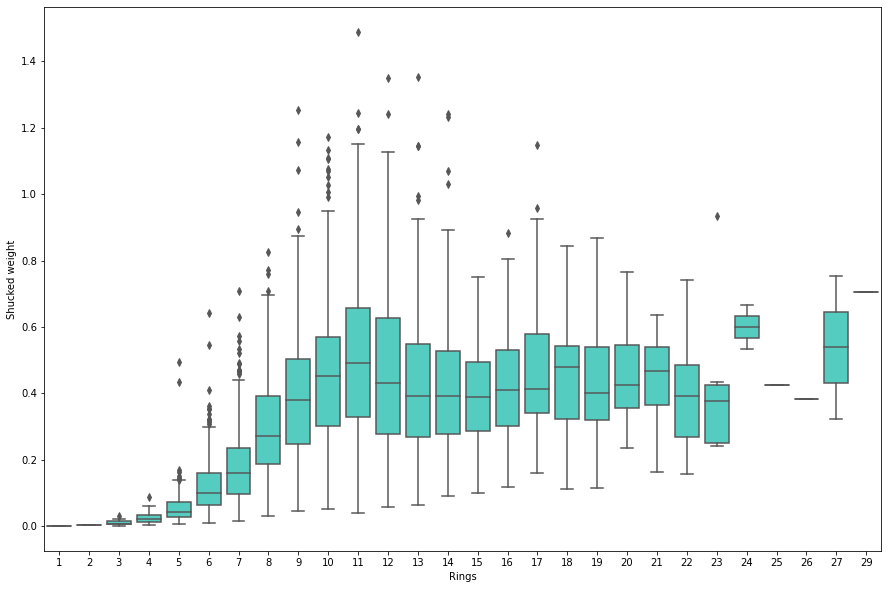

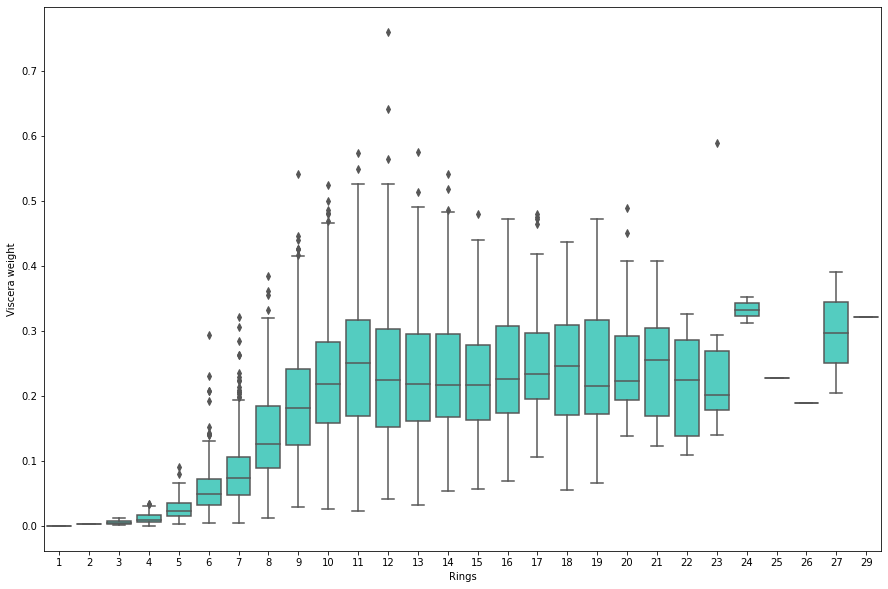

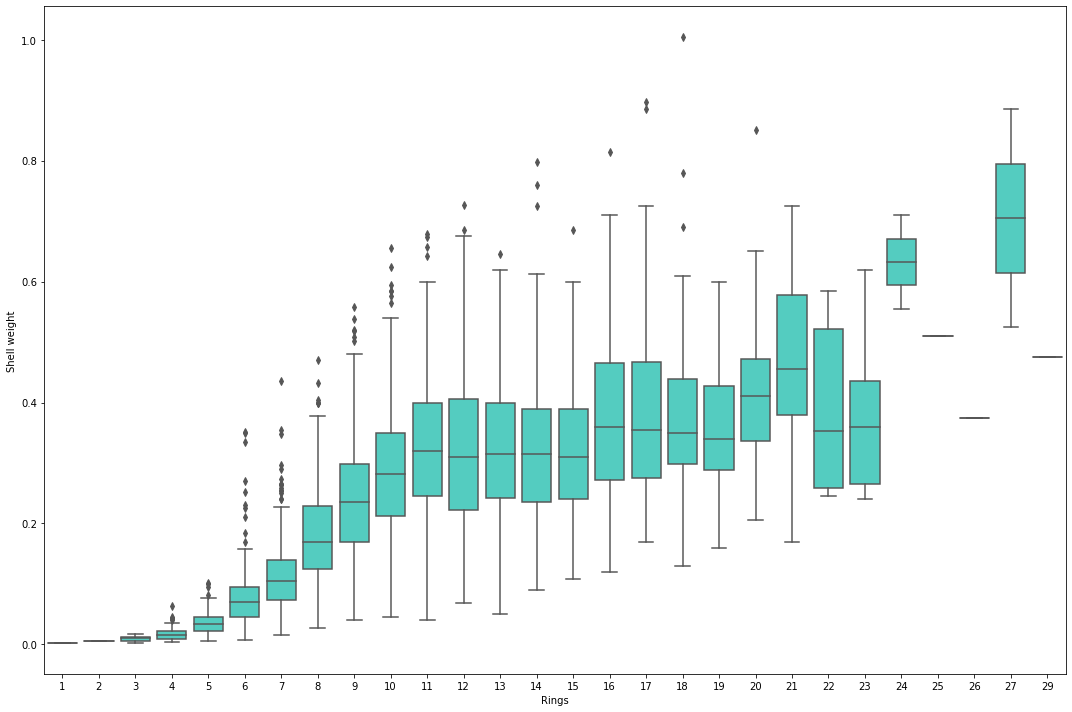

In [11]:
#Box Plot:
index = 0
for col in features.items():
    plt.figure(figsize=(15,10))
    sns.boxplot(x=label, y=col[index], data=df_ab, color="turquoise")
plt.tight_layout()
plt.show()

From this box plot that i have plotted it clearly shows that in each features at certain values outliers are present.
We can see that Shucked Weight ,Viscera Weight,Shell Weight has more outliers.


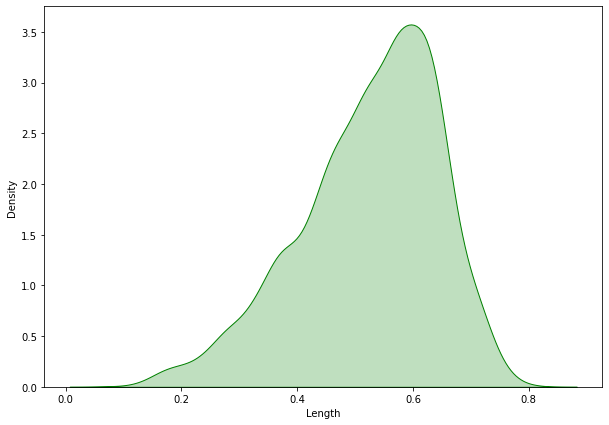

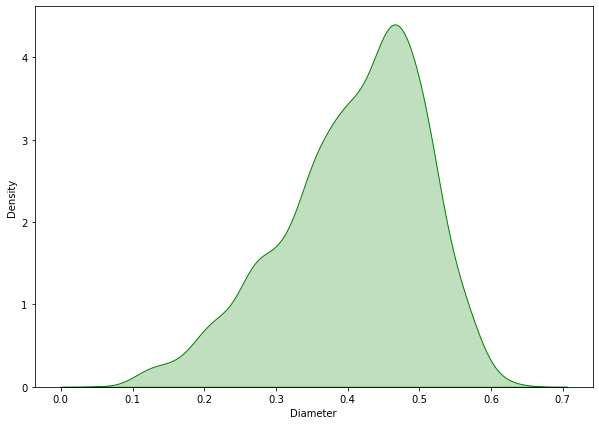

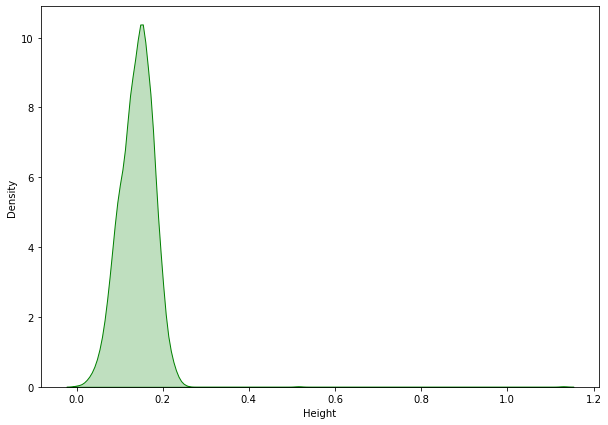

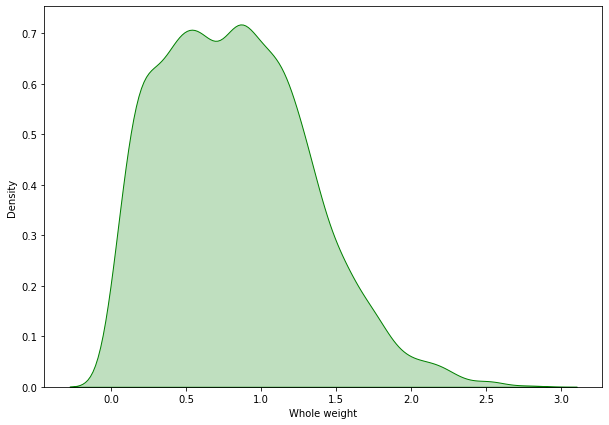

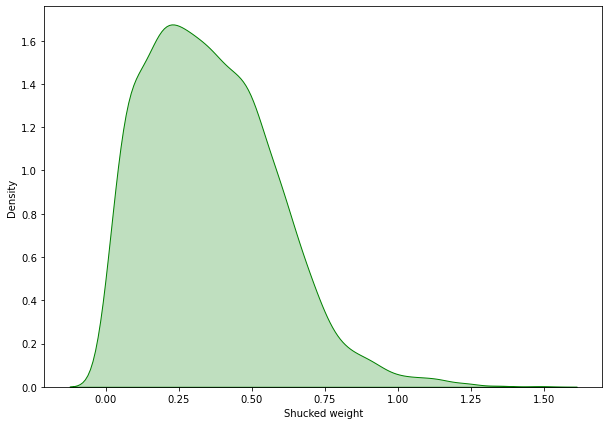

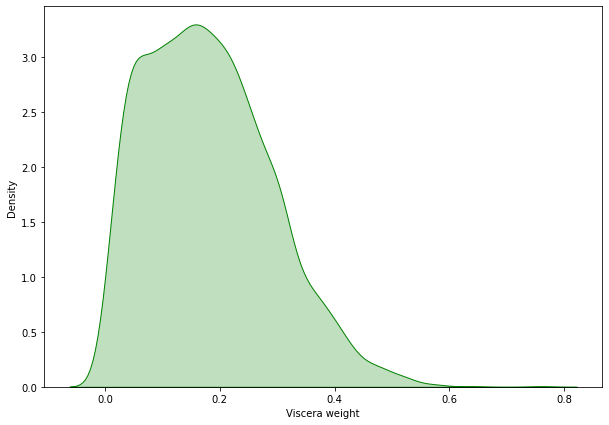

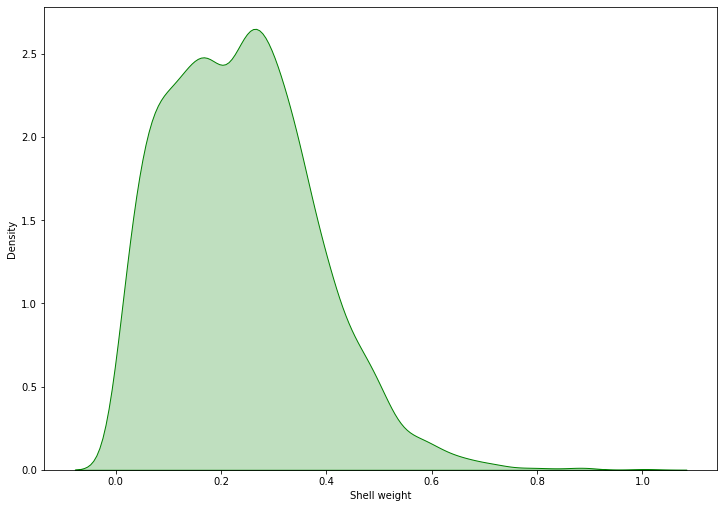

In [12]:
for col, value in features.items():
    plt.figure(figsize=(10,7))
    sns.distplot(value, hist=False, color="g", kde_kws={"shade": True})
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()


From the distplot we can find that due to the presence of outliers in the featuers the data is not normalized and the Standard Deviation is not zero so the plot has no perfect bell shape curve. The Curve is either to the left or right that means it has either positive skewness or negative skewness.

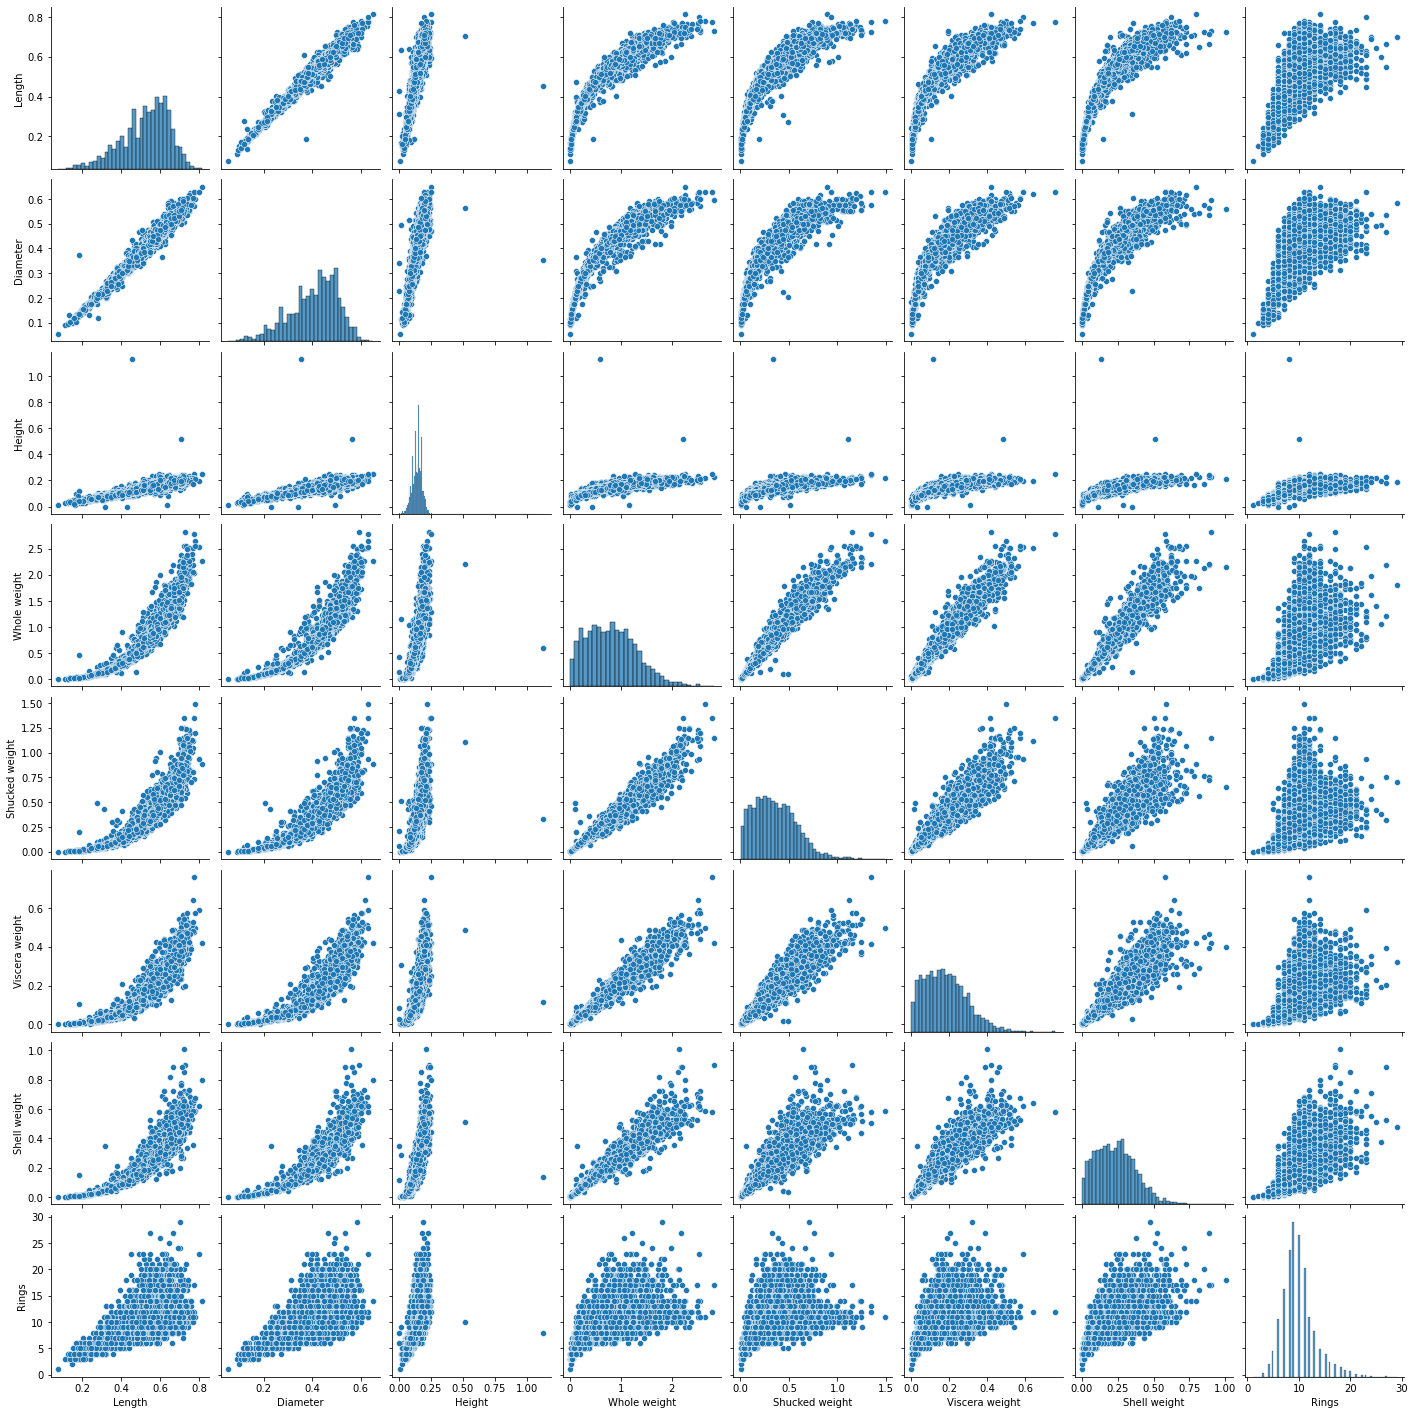

In [13]:
sns.pairplot(df_ab)
plt.show()

The pair plot gievs me the correct pictuarization of data by showing the scatterness in them by scater plotting.and it also makes to to predict wheter the features are highly correlated to each other. This further can be explained more in VFI

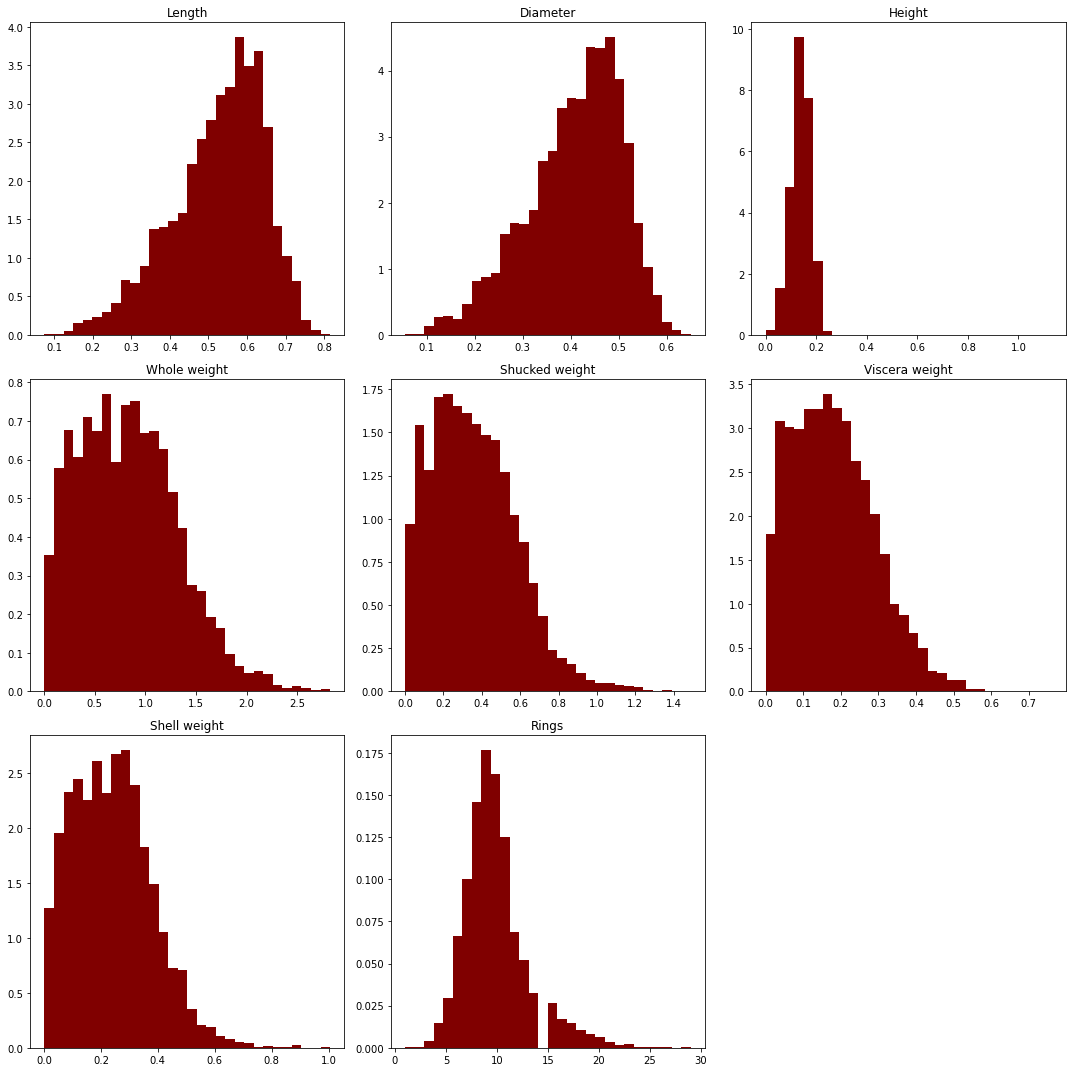

In [14]:
plt.rcParams['figure.figsize'] = (15,15)
df_ab.hist(bins=30, color='maroon', density=True, label='Value', histtype='stepfilled', grid=False)
plt.tight_layout()
plt.show()

This Histogram tells us that all the features has more positive skewness. 

#### Correlation

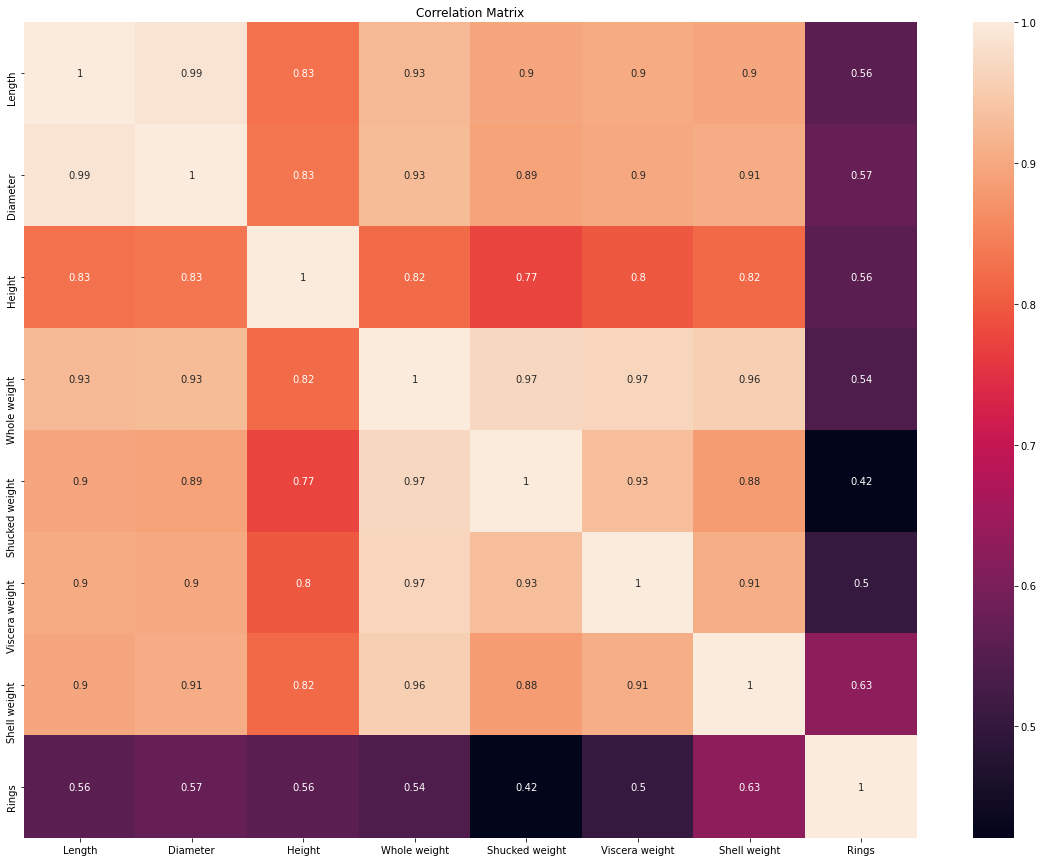

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df_ab.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

### Encoding:

In [16]:
df_ab['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [17]:
df_ab=pd.get_dummies(df_ab)
df_ab

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In order to covnvert the Sex column catogorical column to the integer value here we are doing Encoding by get_dummies method
Where the Sex column is seperated to three different columns one is for infant, male and female.

In [18]:
df_ab['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

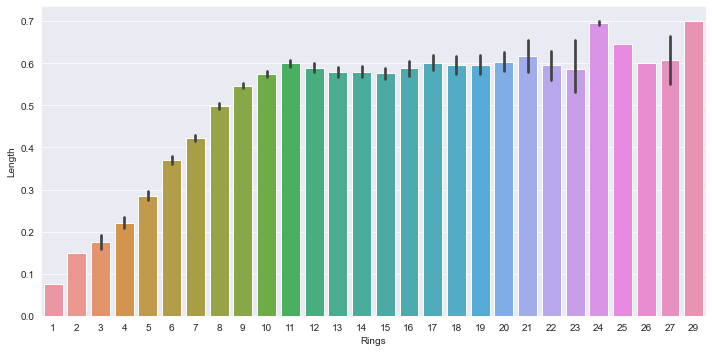

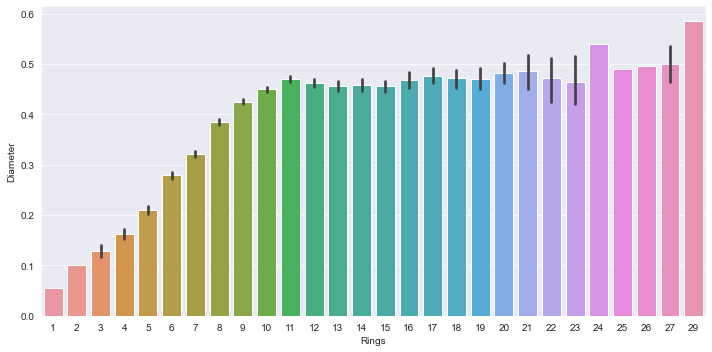

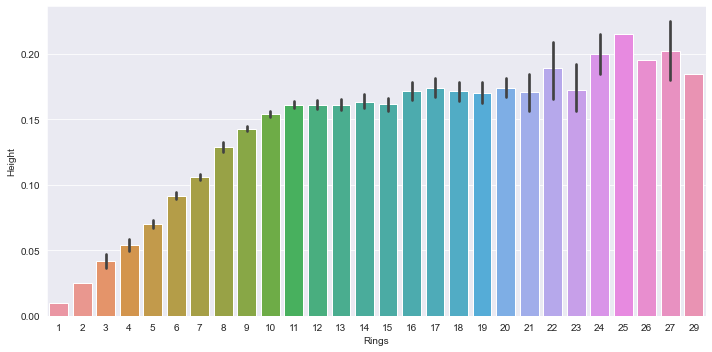

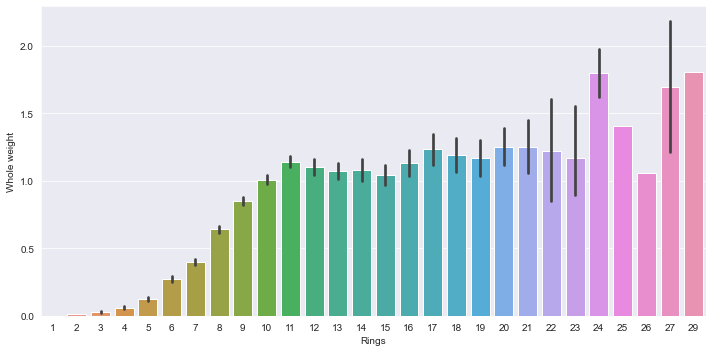

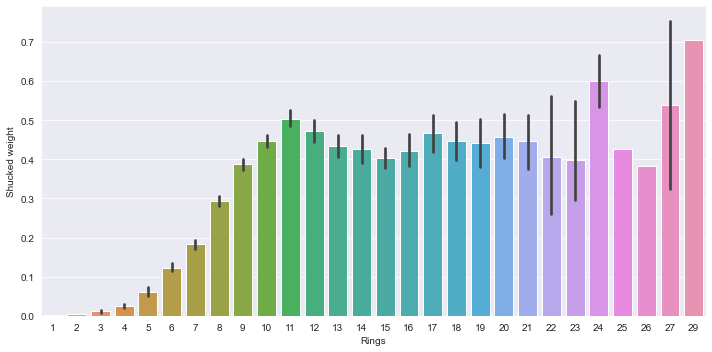

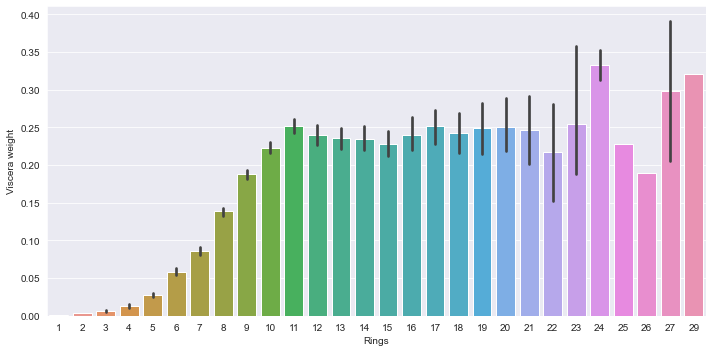

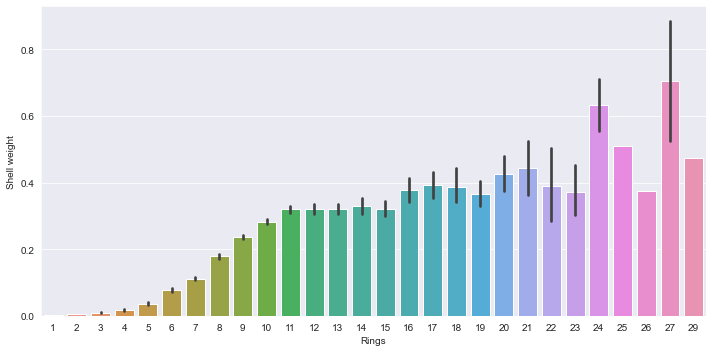

In [19]:
count= features.columns.values
sns.set_style("darkgrid")
for i in count:
    plt.figure(figsize=(10,5))
    sns.barplot(x='Rings',y=i,data=df_ab)
    plt.tight_layout()

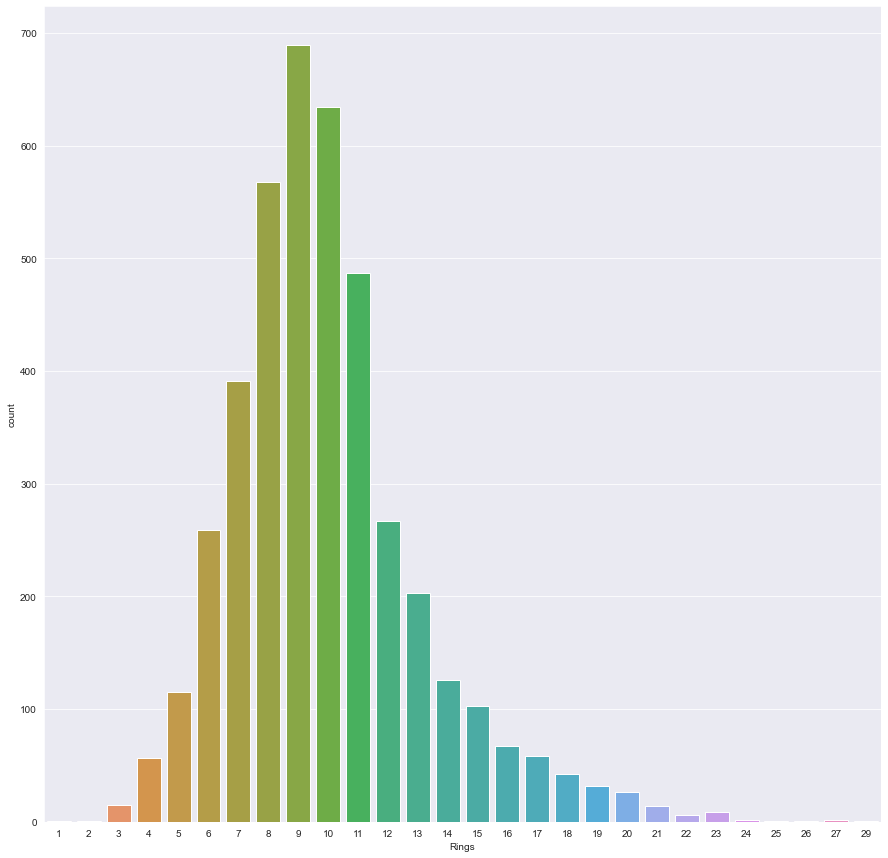

In [20]:
sns.countplot(df_ab['Rings'])
plt.show()

### Removing Outliers:

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df_ab))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.67483383, 0.68801788,
        1.31667716],
       [1.44898585, 1.439929  , 1.18397831, ..., 0.67483383, 0.68801788,
        1.31667716],
       [0.05003309, 0.12213032, 0.10799087, ..., 1.48184628, 0.68801788,
        0.75948762],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.67483383, 0.68801788,
        1.31667716],
       [0.84118198, 0.77718745, 0.25067161, ..., 1.48184628, 0.68801788,
        0.75948762],
       [1.54905203, 1.48263359, 1.32665906, ..., 0.67483383, 0.68801788,
        1.31667716]])

In [22]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [23]:
df_Newab=df_ab[(z<3).all(axis=1)]

In [24]:
print("Shape before".ljust(20),":",df_ab.shape)
print("Shape After".ljust(20),":",df_Newab.shape)
print("%loss".ljust(20),":",((df_ab.shape[0]-df_Newab.shape[0])/df_ab.shape[0]*100))

Shape before         : (4177, 11)
Shape After          : (4027, 11)
%loss                : 3.5910940866650707


Here i have removed the outliers by finding the zscore and fixing a threshold value of 3 and datas which are less than the threshold is considerd as the non outliers data and we are saving it in a new variable for future use.
The percentage of loss of data is very less that only 3.5%

##### Splitting the dataset into x and y variable:

In [25]:
x=df_Newab.drop('Rings',axis=1)
y=df_Newab['Rings']

I am splitting the data into input and output data to build training and testing dataset.

### Variance Inflation Factor:

In [26]:
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

         Features  VIF Values
0          Length   39.165074
1        Diameter   40.852649
2          Height    6.591310
3    Whole weight  108.277063
4  Shucked weight   28.666881
5  Viscera weight   17.151153
6    Shell weight   23.503036
7           Sex_F   27.011268
8           Sex_I   24.955912
9           Sex_M   30.318435


In theory if a VIF is above 10 it indicates high correlation and is cause for concern. Right now we have almost all the feature columns with a high number of VIF value. Feature selection process can be used to omit out the high VIF valued columns but in our dataset we already have very low number of feature columns so will need to try and retain them while making efforts to check if there are other ways to resolve the multi collinearity problem.

Note: In case I drop the high VIF valued columns like Length, Diameter, Whole weight, Shucked weight and Shell weight then I am able to get very high R2 and CV score (close to 100 percent). However it does not make any sense to me that I use only three features Sex, Height and Viscera weight to predict the label Rings (Age) in our dataset.So i am going to handel multicolenearity by using PCA method.

In [27]:
# Feature Scaling:

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.569368,-0.420274,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659,-0.670525,-0.699088,1.328833
1,-1.475358,-1.463127,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033,-0.670525,-0.699088,1.328833
2,0.077768,0.153294,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629,1.491368,-0.699088,-0.752540
3,-0.698795,-0.420274,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574,-0.670525,-0.699088,1.328833
4,-1.647928,-1.567412,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290,-0.670525,1.430434,-0.752540
...,...,...,...,...,...,...,...,...,...,...
4022,0.379764,0.466150,0.732171,0.184584,0.101275,0.612382,0.143240,1.491368,-0.699088,-0.752540
4023,0.595476,0.361865,-0.081420,0.357779,0.435609,0.375293,0.233138,-0.670525,-0.699088,1.328833
4024,0.681761,0.726863,1.816959,0.818169,0.854737,1.081721,0.604453,-0.670525,-0.699088,1.328833
4025,0.897473,0.831148,0.325376,0.639493,0.881387,0.825278,0.510647,1.491368,-0.699088,-0.752540


In [28]:
### 3D Ploting to show more Cleary about multicolinearity

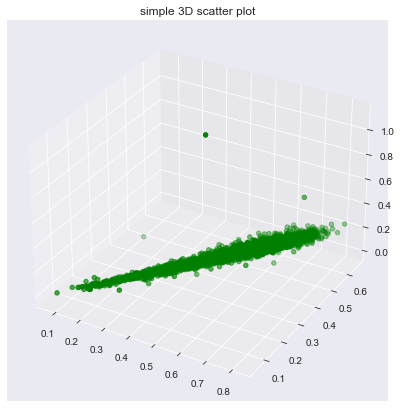

In [29]:
from mpl_toolkits import mplot3d
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_ab['Length'], df_ab['Diameter'], df_ab['Height'], color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

This plot shows that how all the three features are highly correlated to each other.

In [30]:
df_ab.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

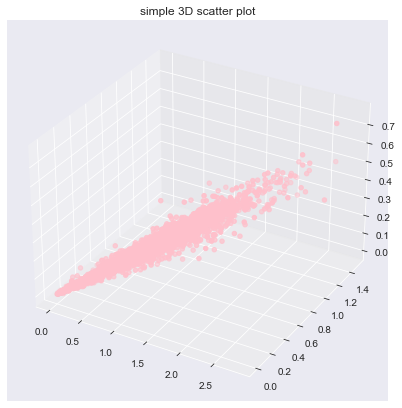

In [31]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_ab['Whole weight'], df_ab['Shucked weight'], df_ab['Viscera weight'], color = "pink")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

### PCA : Principal component analysis.

In [32]:
#PCA:
from sklearn.decomposition import PCA 
pca=PCA(n_components=4)
pca.fit(x)

PCA(n_components=4)

Here i have taken 4 components that means going to fit the 11 columns into 4. before doing this PCA it is very important that we need to scale our features.

In [33]:
x_pca=pca.transform(x)

In [34]:
x_pca.shape

(4027, 4)

Now the features are reduced to 4.

Text(0, 0.5, 'S_PCA')

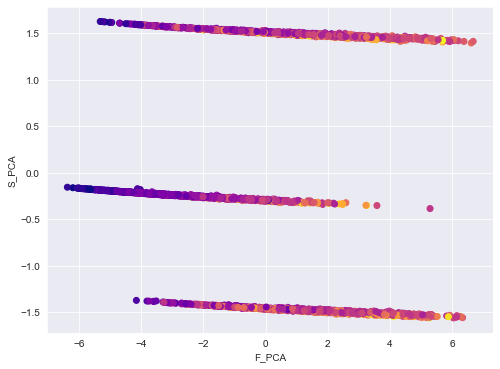

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.xlabel("F_PCA")
plt.ylabel("S_PCA")

Text(0, 0.5, 'Fo_PCA')

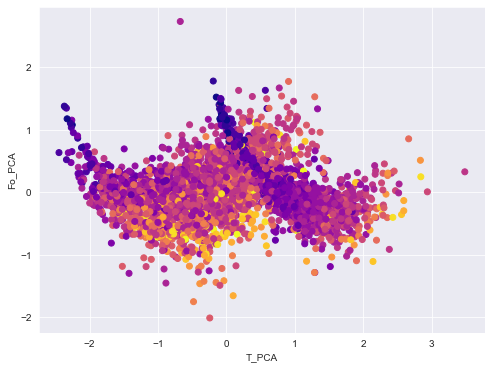

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,2],x_pca[:,3],c=y,cmap='plasma')
plt.xlabel("T_PCA")
plt.ylabel("Fo_PCA")

In multiple linear regression models, covariates are sometimes correlated with one another.
Multicollinearity can cause parameter estimates to be inaccurate, among many other statistical
analysis problems. When these problems arise, there are various remedial measures we can
take. Principal component analysis is one of these measures, and uses the manipulation and
analyzation of data matrices to reduce covariate dimensions, while maximizing the amount of variance.

### Creating the Training and Testing data set:

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25, random_state=101)

### Machine Learning Model for Regression and Evaluation Metrics

In [38]:
# Regression Model Function

def reg(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(x_pca,y, test_size=0.25, random_state=80)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)


In [39]:
# Linear Regression Model

model=LinearRegression()
reg(model, x_pca, y)

RMSE Score is: 2.078032830398353
R2 Score is: 43.76170165328492
Cross Validation Score: 32.421562987823194
R2 Score - Cross Validation Score is 11.34013866546173


In [40]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x_pca, y)

RMSE Score is: 2.0987274727722247
R2 Score is: 42.63599601721771
Cross Validation Score: 35.43313720539911
R2 Score - Cross Validation Score is 7.202858811818594


In [41]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, x_pca, y)

RMSE Score is: 2.7964724551926916
R2 Score is: -1.84704997541838
Cross Validation Score: -30.390597220423594
R2 Score - Cross Validation Score is 28.543547245005215


In [42]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x_pca, y)

RMSE Score is: 2.144226113400796
R2 Score is: 40.121829348119974
Cross Validation Score: 25.419020033754858
R2 Score - Cross Validation Score is 14.702809314365116


In [43]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, x_pca, y)

RMSE Score is: 2.161294733476566
R2 Score is: 39.16474223143738
Cross Validation Score: 25.730573239860753
R2 Score - Cross Validation Score is 13.434168991576627


In [44]:
# SGD Regressor

model=SGDRegressor(penalty='l1', max_iter=2000, learning_rate='optimal')
reg(model, x_pca, y)

RMSE Score is: 2.106742153062419
R2 Score is: 42.1970328653142
Cross Validation Score: 18.336160911709328
R2 Score - Cross Validation Score is 23.86087195360487


In [45]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, x_pca, y)

RMSE Score is: 3.5028177161156324
R2 Score is: -59.79472448985928
Cross Validation Score: -115.68702260492564
R2 Score - Cross Validation Score is 55.89229811506637


In [46]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, x_pca, y)

RMSE Score is: 2.2808333374165324
R2 Score is: 32.24919395831033
Cross Validation Score: 17.865393794781777
R2 Score - Cross Validation Score is 14.383800163528552


In [47]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, x_pca, y)

RMSE Score is: 2.1368517211200277
R2 Score is: 40.53298543321174
Cross Validation Score: 29.927284783997166
R2 Score - Cross Validation Score is 10.605700649214576


After comparing all the regression model we can see that Support Vector Regression model has given least difference in score between the r2 and cross validation so we can consider it as the best model.

### Hyper Parameter Tuning

In [48]:
# Choosing Support Vector Regression

fmod_param = {'kernel' : ['poly', 'sigmoid', 'rbf'], 
              'C' : [0.1,1,2,3,4,5], 
              'gamma' : ['scale','auto'], 
              'epsilon' : [0.2, 0.3, 0.4], 
              'shrinking' : [True, False]}

In [49]:
GSCV = RandomizedSearchCV(SVR(), fmod_param, cv=5)

In [52]:
GSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 2, 3, 4, 5],
                                        'epsilon': [0.2, 0.3, 0.4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]})

In [53]:
GSCV.best_params_

{'shrinking': False, 'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.4, 'C': 1}

In [54]:
final_model=SVR(C=1,epsilon=0.4,gamma= 'scale',kernel='rbf',shrinking= False)
Classifier = final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 42.32284081785566


### Saving the Model:

In [55]:
filename = "Abalone.pkl"
joblib.dump(final_model, filename)

['Abalone.pkl']